<a href="https://colab.research.google.com/github/mingd00/ML/blob/main/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sklearn 라이브러리의 아이리스 데이터 불러오기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

display(X[:3], y[:3])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

array([0, 0, 0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


K-Fold 클래스로 구현

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 생성
model = LogisticRegression()

# KFold 객체 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 점수를 저장할 리스트
scores = []

# K-겹 교차 검증 수행
for train_index, test_index in kf.split(X):
    # 훈련 데이터와 테스트 데이터 분리
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 모델 훈련
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 정확도 계산
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# 결과 출력
print("교차 검증 점수:", scores)
print("평균 교차 검증 점수:", np.mean(scores))
print("표준 편차:", np.std(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

교차 검증 점수: [1.0, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667]
평균 교차 검증 점수: 0.9733333333333334
표준 편차: 0.024944382578492935


cross_val_score로 구현

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 모델 생성
model = LogisticRegression()

# 5-겹 교차 검증 수행
scores = cross_val_score(model, X, y, cv=5)

# 결과 출력
print("교차 검증 점수:", scores)
print("평균 교차 검증 점수:", np.mean(scores))
print("표준 편차:", np.std(scores))

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]
평균 교차 검증 점수: 0.9733333333333334
표준 편차: 0.02494438257849294


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ridge 클래스로 모델 생성하고 GridSearchCV로 하이퍼파라미터 튜닝하기

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np


# 데이터셋 로드
data = load_diabetes()
X = data.data
y = data.target

display(X[:3], y[:3])

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

array([151.,  75., 141.])

In [ ]:
# 학습용 데이터와 테스트용 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# K-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# alpha 값의 후보 리스트
alpha_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
scores_list = []

# Ridge 회귀 모델 정의
ridge = Ridge()

# 각 alpha에 대한 교차 검증 수행
for alpha in alpha_list:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf) # 교차검증
    scores_list.append(np.mean(scores)) # 점수 저장

In [ ]:
# 최적 alpha 값 및 성능 확인
optimal_alpha =alpha_list[np.argmax(scores_list)]
best_score = max(scores_list)

print(f"Optimal alpha: {optimal_alpha}")
print(f"Best Score: {best_score}")

Optimal alpha: 0.01
Best Score: -3075.7956413169964


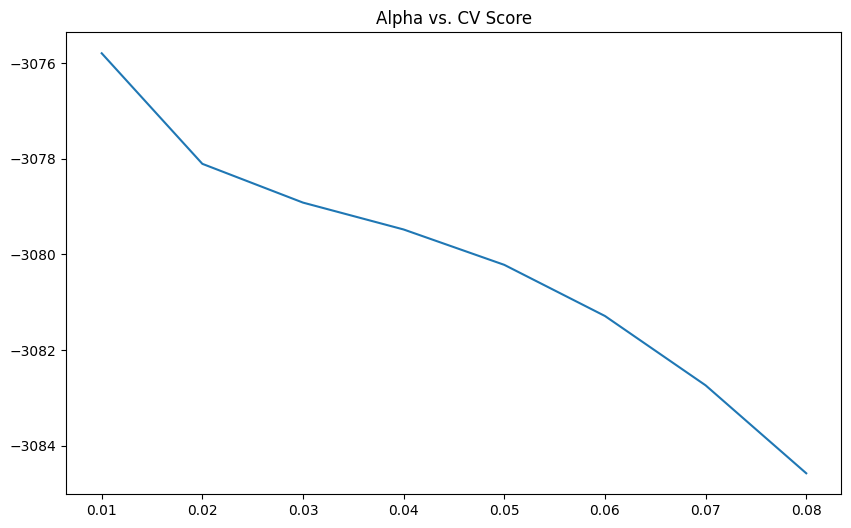

In [ ]:
# 결과 시각화
plt.figure(figsize=(10,6))
plt.plot(alpha_list, scores_list)
plt.title('Alpha vs. CV Score')
plt.show()